# Lab Assignment Seven: Sequential Network Architectures

Miller Boyd

## Overview
In this lab, you will select a prediction task to perform on your dataset, evaluate sequential network architectures, and tune hyper-parameters. If any part of the assignment is not clear, ask the instructor to clarify. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.


## Dataset Selection

Select a dataset that is text. That is, the dataset should be text data. It is helpful to have a medium-sized dataset of similar sized text documents for generalization performance. It is acceptable to perform binary classification or multi-class classification. The classification should be "many-to-one" sequence classification.


Sentiment Analysis for Financial News

https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

### Preparation (3 points total)
1. **Define and prepare your class variables. (1 point)**
   - Use proper variable representations (int, float, one-hot, etc.).
   - Use pre-processing methods as needed.
   - Describe the final dataset used for classification/regression.
   - Discuss methods of tokenization in your dataset and any decisions to force a specific length of sequence.

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('all-data.csv')

# Display the first few rows of the dataset
print("Initial Data:")
print(df.head())


Initial Data:
      label                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


In [20]:
# Encode class labels as integers
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Optionally convert integer class labels to one-hot encoding
onehot_encoder = OneHotEncoder()
label_onehot = onehot_encoder.fit_transform(df['label_encoded'].values.reshape(-1, 1))

# Print the mapping of labels
print("\nLabel Encoding:")
print({i: label for i, label in enumerate(label_encoder.classes_)})

# Display the first few rows to confirm label encoding
print("\nSample Data:")
print(df[['text', 'label', 'label_encoded']].head())


Label Encoding:
{0: 'negative', 1: 'neutral', 2: 'positive'}

Sample Data:
                                                text     label  label_encoded
0  According to Gran , the company has no plans t...   neutral              1
1  Technopolis plans to develop in stages an area...   neutral              1
2  The international electronic industry company ...  negative              0
3  With the new production plant the company woul...  positive              2
4  According to the company 's updated strategy f...  positive              2


2. **Choose and explain your evaluation metric(s). (1 point)**
   - Provide a detailed argument for why your chosen metric(s) are appropriate for your data and the task.
   - Consider the relevance of the metric in terms of the business case.

Business Case: In a business setting, correctly identifying the sentiment of user feedback could be crucial for customer relationship management, guiding responses to customer feedback, and improving services or products. Therefore, accuracy might also be a straightforward metric for stakeholders to understand the model’s performance, alongside the F1 score to ensure balanced performance across all sentiment categories.

C:\Users\wnd\AppData\Local\Temp\ipykernel_764280\355400108.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['label'], palette='cividis')


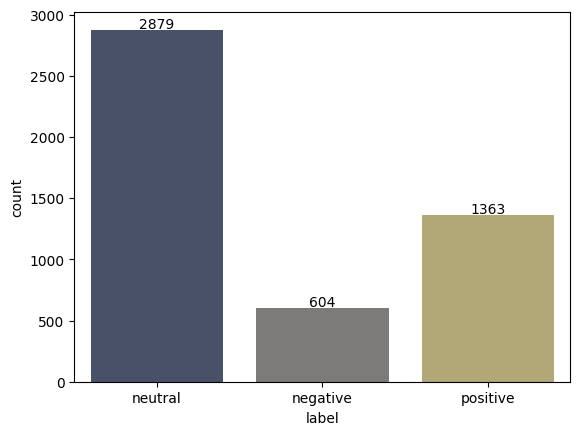

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the plot
ax = sns.countplot(x=df['label'], palette='cividis')

# Annotating bar heights
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha='center', va='center', xytext=(0, 4), textcoords='offset points')

# Setting custom x-tick labels to reflect actual labels since we are not dealing with 'ham' and 'spam'
plt.xticks(range(len(df['label'].unique())), df['label'].unique())

plt.show()


The F1 score is particularly suitable for evaluating your sentiment analysis model given the class imbalance evident from the count plot. This metric, which is the harmonic mean of precision and recall, ensures a balanced measure of a classifier's performance, emphasizing both the accuracy of positive predictions and the model’s ability to identify all relevant cases. The F1 score is valuable in sentiment analysis because it equally weighs all sentiment classes—neutral, negative, and positive—preventing bias toward the majority class and ensuring fairness in evaluating the model's ability to handle each sentiment effectively, which is crucial for deriving accurate business insights from customer feedback.

3. **Data splitting method. (1 point)**
   - Choose the method you will use for dividing your data into training and testing (e.g., Stratified 10-fold cross-validation, Shuffle splits).
   - Explain why your chosen method is appropriate or use more than one method as needed.
   - Convince that your train/test splitting method is a realistic mirroring of how an algorithm would be used in practice.

In [23]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, train_test_split
from sklearn.preprocessing import LabelEncoder

# Extract features and labels
X = df['text']
y = df['label']

# Stratified K-Fold Cross-Validation setup
skf = StratifiedKFold(n_splits=10)
print("Stratified K-Fold Cross-Validation indices and sizes:")
for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Example: Print the size of each fold
    print(f"Fold {fold}")
    print(f"TRAIN size: {len(train_index)}, TEST size: {len(test_index)}")


Stratified K-Fold Cross-Validation indices:
TRAIN: [ 161  162  163 ... 4843 4844 4845] TEST: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  186  210  221  223  233  295  309
  319  354  392  393  394  395  396  397  399  400  401

    Why: This method involves dividing your data into 'k' different subsets (or folds) and ensures that each fold is a good representative of the whole by maintaining the same percentage of samples of each target class as the complete set. Given the class imbalance in your dataset, using stratified folds is crucial to prevent any fold from being overrepresented by one class. This is important for training a model that performs consistently well across all classes.
    Realistic Mirroring: In practice, your model needs to perform well on unseen data that likely follows the same distribution as your collected data. Stratified cross-validation provides a rigorous testing environment by repeatedly evaluating the model on different subsets of data, which simulates the process of encountering new data after deployment.


### Modeling (6 points total)
1. **Investigate sequential network architectures. (3 points)**
   - Explore at least two different architectures (e.g., CNN, Transformer, recurrent networks).
   - Include an embedding layer; consider using a pre-trained embedding if possible.
   - Adjust one hyper-parameter of each network to potentially improve generalization performance.
   - Train a total of at least four models.
   - Visualize the performance of training and validation sets versus the training iterations, showing that the models converged.

2. **Enhance the Transformer network. (1 point)**
   - Using the best parameters and architecture from the previous step, add a second Multi-headed self-attention layer to your network.
   - Visualize the performance of training and validation sets versus the training iterations, showing that the model converged.

3. **Evaluate and compare the models. (2 points)**
   - Use the method of train/test splitting and evaluation criteria argued for at the beginning of the lab.
   - Visualize the results of all the models you trained.
   - Use proper statistical comparison techniques to determine which method(s) is (are) superior.

### Exceptional Work (1 point total)
- You have free rein to provide additional analyses.
- **For 7000 level students (required)**: Use the pre-trained ConceptNet Numberbatch embedding and compare to pre-trained GloVe. Which method is better for your specific application?

## Submission Instructions
- Upload a single rendered Jupyter notebook per team that includes all code, visualizations, and textual descriptions.
- Ensure all visualizations and results are reproducible based on the code and descriptions provided.